# Tests for changing shapes

We want to see what happens to the recurrents when we change shapes...

In [81]:
# Loading standard library
load("../sorted_sandpile.py")

def visual_degree(p):
    q_max = p.degrees()[0]
    t_max = p.degrees()[1]
    max_deg = max([q_max,t_max])
    # Compute the matrix
    coeff_matrix = [[p.coefficient([q_deg, t_deg]) for t_deg in range(max_deg + 1)] for q_deg in range(max_deg + 1)]
    # Plot the matrix
    return matrix_plot(matrix(coeff_matrix))

# Defining a sandpile generator, where we have more freedom on the sink
def Multi_CliqueIndependent_SortedSandpile_FreeSink(mu, nu, kmul, hmul = -1, sink_out = {}, sink_in = {}):
    r"""
        Construction of the Sorted Sandpile, given two partitions mu, nu, where edges have multeplicity k in each clique and multeplicity h between components.
    """
    if hmul == -1:     # If third argument is not given, assume it is equal to k
        hmul = kmul

    mu_num = sum(mu)                                    # Number of independent vertices
    nu_num = sum(nu)                                    # Number of vertices in cliques
    perm_group = []                                     # Initialize the permutation group acting on the graph

    # Format the multeplicities in/out of the sink
    sink_out = sink_out | {v:1 for v in range(1, mu_num+nu_num+1) if v not in sink_out.keys()}
    sink_in = sink_in | {v:1 for v in range(1, mu_num+nu_num+1) if v not in sink_in.keys()}

    # Initialize the dictionary with the out-edges of the sink
    d = {0 : [v for v in range(1, mu_num+nu_num+1) for i in range(sink_out[v])]}
    
    part_first = 1                                      # Keeps track of first vertex of current part
    for part_nu in nu:                                          # Add edges for independent vertices. For each part...
        for i in range(part_nu):
            indep = [vert for vert in range(mu_num + nu_num + 1) for mult in range(kmul-1) if (part_first <= vert) and (vert < part_first + part_nu) and (vert != part_first + i)]
            others = [vert for vert in range(mu_num + nu_num + 1) for mult in range(hmul) if ((0 < vert) and (vert < part_first)) or (vert >= part_first + part_nu)]
            d[part_first + i] = [0]*sink_in[part_first + i] + indep + others
                                                                        # ...add all edges except for other vertices in part_nu    
        perm_group.append([part_first+j for j in range(part_nu)])       # Add the permutation orbit for the nu_part
        part_first += part_nu
    mu_rev = copy.copy(mu)                                              # We need the reversed partition mu...
    mu_rev.reverse()
    for part_mu in mu_rev:                                      # Add edges for clique sets. For each part...
        for i in range(part_mu):
            clique = [vert for vert in range(mu_num + nu_num + 1) for mult in range(kmul) if (part_first <= vert) and (vert < part_first + part_mu) and (vert != part_first + i)]
            others = [vert for vert in range(mu_num + nu_num + 1) for mult in range(hmul) if ((0 < vert) and (vert < part_first)) or (vert >= part_first + part_mu)]
            d[part_first + i] = [0]*sink_in[part_first + i] + clique + others
        perm_group.append([part_first+j for j in range(part_mu)])       # Add the permutation orbit for the mu_part
        part_first += part_mu

    ordered = []
    for i in range(len(mu)):
        temp = copy.copy(perm_group[len(perm_group)-i-1])
        temp.sort()
        ordered = ordered + temp
    for j in range(len(nu)):
        temp = copy.copy(perm_group[len(nu)-j-1])
        temp.sort(reverse = True)
        ordered = ordered + temp
    #print(d)
    G = Graph(d)            # type: ignore      # Define the clique-independent graph
    specif_opt = ["mul-clique-indep", [mu, nu],  ordered, kmul, hmul]
    '''
        Specific Options:
        1-  list of the defining partitions
        2-  reading order
    '''
    S = SortedSandpile(G, 0, perm_group, specif_opt)
    return S

In [82]:
n = 3
k = 1
outs = {3:2}
ins = {3:1}

S1 = Multi_CliqueIndependent_SortedSandpile_FreeSink([n], [], k, sink_out = {}, sink_in = {})
S2 = Multi_CliqueIndependent_SortedSandpile_FreeSink([n], [], k, sink_out = outs, sink_in = ins)



srec1 = S1.sorted_recurrents()
srec2 = S2.sorted_recurrents()
print(srec1)
print(srec2)
print([v for v in srec2 if v not in srec1])

[{1: 2, 2: 2, 3: 2}, {1: 1, 2: 1, 3: 2}, {1: 1, 2: 2, 3: 2}, {1: 0, 2: 2, 3: 2}, {1: 0, 2: 1, 3: 2}]
[{1: 2, 2: 2, 3: 3}, {1: 1, 2: 1, 3: 2}, {1: 1, 2: 2, 3: 2}, {1: 1, 2: 1, 3: 3}, {1: 2, 2: 2, 3: 2}, {1: 0, 2: 2, 3: 3}, {1: 1, 2: 2, 3: 3}, {1: 0, 2: 2, 3: 2}, {1: 0, 2: 1, 3: 2}, {1: 0, 2: 1, 3: 3}]
[{1: 2, 2: 2, 3: 3}, {1: 1, 2: 1, 3: 3}, {1: 0, 2: 2, 3: 3}, {1: 1, 2: 2, 3: 3}, {1: 0, 2: 1, 3: 3}]


Polynomial cl:  q^3 + q^2*t + q*t^2 + t^3 + q*t
Polynomial new: q*t^6 + q^2*t^4 + t^6 + q^3*t^2 + q*t^4 + q^4 + 2*q^2*t^2 + q^3 + q*t^2


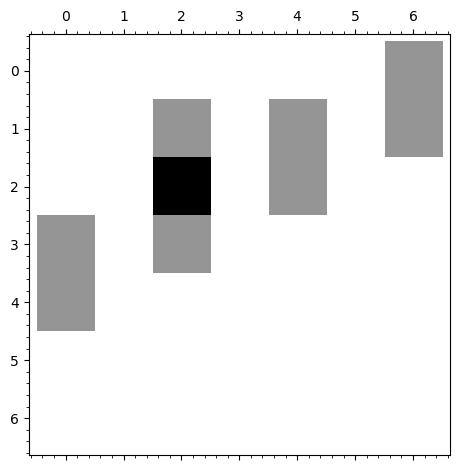

In [83]:
polyS1 = S1.qt_Polynomial()
polyS2 = S2.qt_Polynomial()
print("Polynomial cl:  {}\nPolynomial new: {}".format(polyS1,polyS2))
visual_degree(numerator(polyS2))